Part 1: Setup, File Imports & Data Loading

In this section, we perform three main tasks:

Package Installation & Imports:

  (We first install (or update) the required libraries — including kagglehub, pandas, scikit-learn, matplotlib, seaborn, and xgboost. Then, we import these libraries along with OS utilities and the Python ZipFile module. This ensures that our Colab environment has all the tools needed for data handling, analysis, visualization, and modeling.)

Dataset Download & Extraction:

(Using kagglehub, the script downloads the TMDB movies dataset automatically from Kaggle. The downloaded dataset is in a zipped file format; we then extract its contents so that the individual CSV file (in this case, TMDB_movie_dataset_v11.csv) can be accessed.)

Data Loading:

(Finally, we load the CSV file into a pandas DataFrame. If the file isn’t found or another error occurs during loading, an error will be printed. We also print information like the dataset path and the shape of the DataFrame to verify that the data has been loaded successfully.)


In [1]:
# %% [1] Setup and Data Loading
# -----------------------------------------------------------------------------
# Install necessary packages (if not already installed) and import libraries.
!pip install -U kagglehub pandas scikit-learn matplotlib seaborn xgboost -q

import kagglehub        # Download datasets from Kaggle
import pandas as pd      # Data manipulation and analysis
import numpy as np       # Numerical operations
import matplotlib.pyplot as plt  # Plotting graphs
import seaborn as sns    # Advanced visualization
import os                # Operating system utilities
from zipfile import ZipFile  # To extract zip files

# Download the TMDB movies dataset using kagglehub.
path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")
print(f"Dataset path: {path}")

# -----------------------------------------------------------------------------
# Extract the dataset from the downloaded zip file.
zip_path = os.path.join(path, 'tmdb-movies-dataset-2023-930k-movies.zip')
if os.path.exists(zip_path):
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(path)
    print("Files after extraction:", os.listdir(path))

# Identify the actual CSV file name and load it into a DataFrame.
csv_file = 'TMDB_movie_dataset_v11.csv'
csv_path = os.path.join(path, csv_file)
try:
    df = pd.read_csv(csv_path)
    print(f"Data loaded successfully from {csv_file}!\nShape: {df.shape}")
except Exception as e:
    print("Error loading data:", e)
    raise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 609.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.8/870.8 kB 47.7 MB/s eta 0:00

100%|██████████| 209M/209M [00:02<00:00, 95.3MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/482
Data loaded successfully from TMDB_movie_dataset_v11.csv!
Shape: (1177401, 24)


Part 2: Verify Dataset Columns

This part is a quick sanity check:

The code prints out the list of column names available in the DataFrame.
This helps you verify exactly what features exist in the dataset, which is crucial for designing your feature engineering and modeling steps later.

In [2]:
# %% [2] Verify Columns
# -----------------------------------------------------------------------------
# Display all the column names to verify what features are available.
print("\n=== Dataset Columns ===")
print(df.columns.tolist())



=== Dataset Columns ===
['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords']


Part 3: Data Preprocessing and Feature Engineering

Here we prepare the data for modeling by doing the following:

Data Cleaning:
(
We remove rows missing crucial values (like revenue and budget) and fill in missing values in the runtime column with its median. We also convert the release date from a string into a datetime object for easier processing.)

Data Filtering:
(
The dataset is filtered to include only movies with significant budgets and revenues, and we also keep only movies whose status is "Released" to ensure reliability.)

Feature Engineering:
(
A helper function is used to process the genres (assuming they are separated by the "|" character) so that we can extract the primary genre. We then derive additional features including:

  Release Year: Extraction of the year from the release date.

  Profit Ratio: A calculated metric, defined as (revenue - budget) divided by (budget + 1) to avoid division by zero.)

Budget by Genre:
(The average budget per primary genre, computed by grouping the dataset by the primary genre and then applying a transformation.
Finally, we specify the list of final features (input variables) and the target variable (revenue) for modeling.)

In [3]:
# %% [3] Data Preprocessing and Feature Engineering
# -----------------------------------------------------------------------------
# Remove rows missing 'revenue' or 'budget' as these are critical.
df = df.dropna(subset=['revenue', 'budget'])

# Fill missing values in 'runtime' with its median.
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

# Convert 'release_date' to datetime format.
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Keep only movies with reasonable budgets, revenues, and that have been officially released.
df = df[(df['budget'] > 10000) & (df['revenue'] > 10000)]
df = df[df['status'] == 'Released']

# Define a helper function to process the 'genres' string.
def process_genres(x):
    try:
        return x.split('|')[0] if pd.notna(x) else 'Unknown'
    except:
        return 'Unknown'

# Create new features.
df['primary_genre'] = df['genres'].apply(process_genres)       # Primary genre
df['release_year'] = df['release_date'].dt.year                   # Year of release
df['profit_ratio'] = (df['revenue'] - df['budget']) / (df['budget'] + 1)  # Profitability
df['budget_by_genre'] = df.groupby('primary_genre')['budget'].transform('mean')  # Avg budget per genre

# Specify final input features and target.
features = ['budget', 'runtime', 'popularity', 'vote_average',
            'primary_genre', 'release_year', 'budget_by_genre']
target = 'revenue'


<ipython-input-3-1e8a4cdc1cf1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['primary_genre'] = df['genres'].apply(process_genres)       # Primary genre
<ipython-input-3-1e8a4cdc1cf1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_date'].dt.year                   # Year of release
<ipython-input-3-1e8a4cdc1cf1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Part 4: Exploratory Data Analysis (EDA) and Visualization

This section focuses on understanding the data visually:

Revenue Distribution:
(
A histogram with kernel density estimation (KDE) is generated for the log-transformed revenue. The log transformation helps in visualizing a dataset with long-tailed revenue distributions.)

Correlation Heatmap:
(
We create a heatmap to show the correlation between key numerical features (e.g., budget, revenue, popularity, and runtime), offering insights into which factors may be closely related.)

Revenue by Genre:
(
A boxplot is generated to compare the revenue distributions among different primary genres. The revenue values are limited to below 100 million in order to avoid cluttering the plot, making trends more visible.)

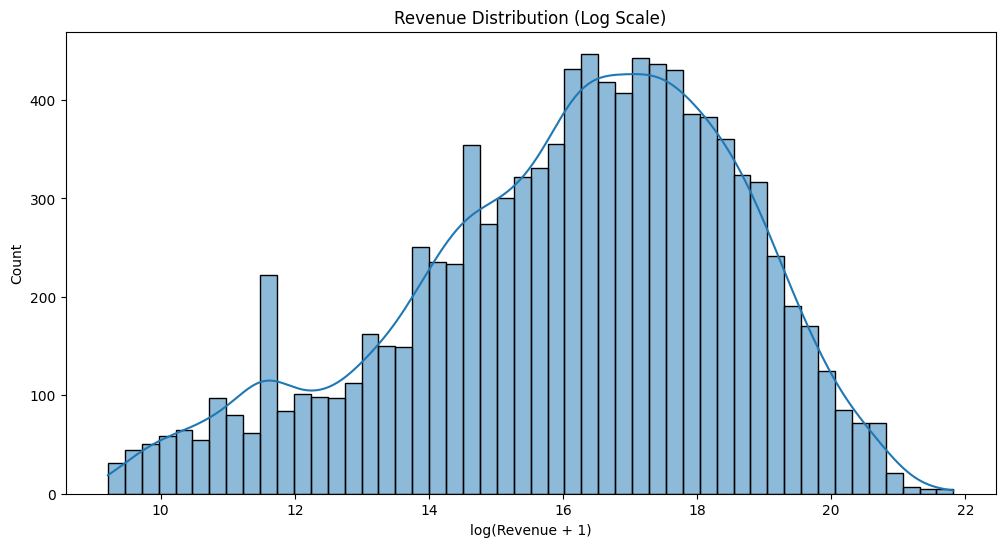

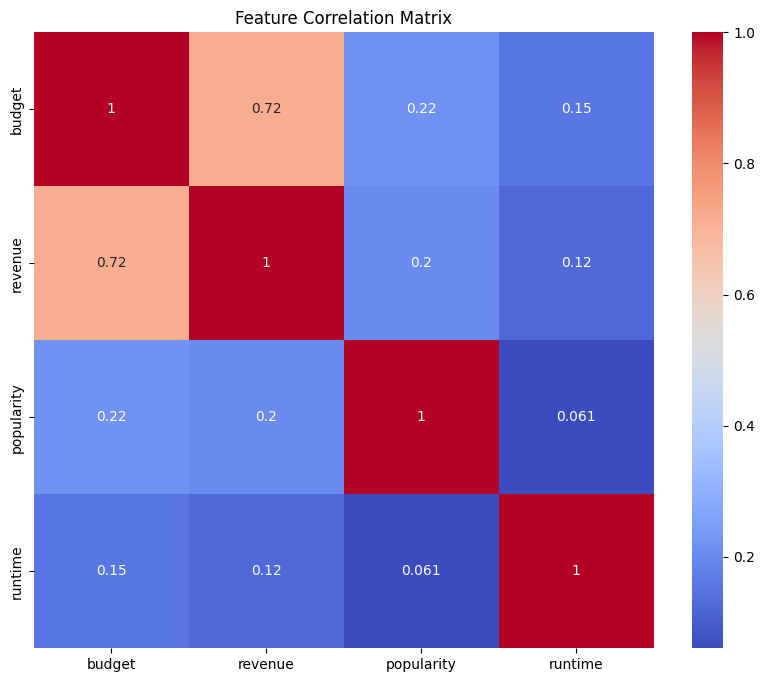

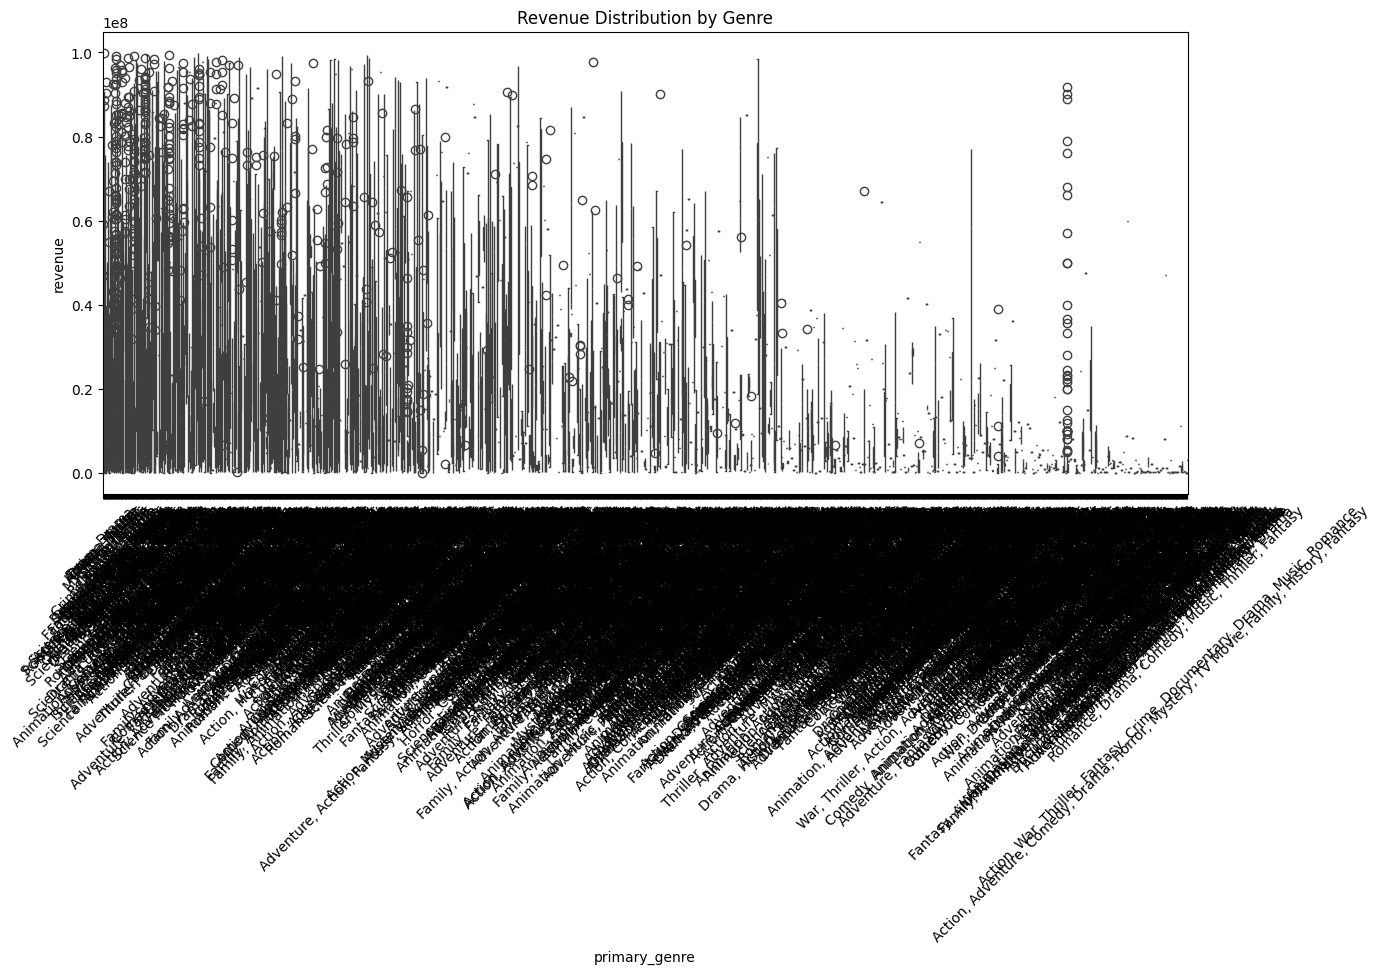

In [4]:
# %% [4] EDA and Visualization
# -----------------------------------------------------------------------------
# Plot the revenue distribution after log transformation.
plt.figure(figsize=(12,6))
sns.histplot(np.log1p(df[target]), kde=True, bins=50)
plt.title('Revenue Distribution (Log Scale)')
plt.xlabel('log(Revenue + 1)')
plt.show()

# Display a correlation heatmap of selected numerical features.
plt.figure(figsize=(10,8))
corr = df[['budget', 'revenue', 'popularity', 'runtime']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Generate a boxplot to inspect revenue distribution by primary genre,
# limiting to movies with revenue less than 100 million for clarity.
plt.figure(figsize=(14,6))
sns.boxplot(x='primary_genre', y='revenue', data=df[df['revenue'] < 1e8])
plt.xticks(rotation=45)
plt.title('Revenue Distribution by Genre')
plt.show()


Part 5: Model Pipeline and Data Splitting

This section prepares the data for machine learning by building a pipeline:

Preprocessing Pipeline:
(
A ColumnTransformer is defined to apply two kinds of preprocessing:
Numerical Features: Standardized using StandardScaler.
Categorical Features: Encoded using OneHotEncoder.)

Pipeline Construction:
(
The preprocessing steps are combined with a RandomForestRegressor in a cohesive pipeline. This allows the entire process—ranging from data transformation to modeling—to be treated as one object.)

Data Splitting:
(
The dataset is split into training and test sets. In addition, the revenue target is log-transformed (using np.log1p) to stabilize its variance; this transformation is reversed during evaluation.)

In [5]:
# %% [5] Model Pipeline and Data Splitting
# -----------------------------------------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define a ColumnTransformer to scale numerical features and one-hot encode categorical ones.
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['budget', 'runtime', 'popularity', 'budget_by_genre']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['primary_genre', 'release_year'])
])

# Build a pipeline with the preprocessor followed by a Random Forest regressor.
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Prepare features and target; apply log transformation to the target variable.
X = df[features]
y = np.log1p(df[target])  # Log-transform target for stability

# Split dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Part 6: Hyperparameter Tuning

In this section, we fine-tune our Random Forest model to achieve the best performance:

GridSearchCV:
(
We define a grid of hyperparameters (number of trees, max depth, and minimum samples for split) and perform exhaustive search using 3-fold cross-validation. The best set of parameters is determined based on negative mean absolute error.)

RandomizedSearchCV:
(
In addition to grid search, we perform randomized search over a broader range of hyperparameters for additional flexibility. After a fixed number of iterations, we also select the best performing model.)

Model Selection:
(
For later evaluation and deployment, we choose one of the best models (in this example, the one from GridSearchCV)

In [6]:
# %% [6] Hyperparameter Tuning
# -----------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# --- GridSearchCV Tuning ---
# Define a grid of hyperparameters for the RandomForest.
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 20],
    'regressor__min_samples_split': [2, 5]
}

# Execute grid search using 3-fold cross-validation.
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print("Best parameters from GridSearchCV:", grid_search.best_params_)
best_model_grid = grid_search.best_estimator_

# --- RandomizedSearchCV Tuning ---
# Define a randomized parameter distribution.
param_dist = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

# Execute randomized search with 10 iterations.
random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=10, cv=3,
                                   scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)
best_model_random = random_search.best_estimator_

# For final evaluation, choose the best model from grid search.
best_model = best_model_grid


Best parameters from GridSearchCV: {'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best parameters from RandomizedSearchCV: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 10, 'regressor__max_depth': 20}


Part 7: Evaluation and Additional Plots

This part evaluates the model’s performance both quantitatively and visually:

Metric Calculation:

(A helper function calculates the Mean Absolute Error (MAE) and R² score. Since the target was log-transformed, the predictions are reverted to the original scale using np.expm1.)

Actual vs. Predicted Plot:
(
A scatter plot is generated to visualize the relationship between the actual and predicted revenue. A red dashed line indicates the ideal scenario where predictions match the actual values.)

Residuals Distribution:
(
We plot a histogram of the residuals (differences between actual and predicted revenues), which helps in diagnosing any patterns or biases in the model’s errors.)

Learning Curve:
(
A learning curve plot shows how the model performance (measured by MAE) changes with the amount of training data. This is useful to understand if more data might help improve performance or if the model is over/under-fitting.)



=== Training Metrics ===
MAE: $0.82
R²: 0.901

=== Test Metrics ===
MAE: $1.93
R²: 0.617


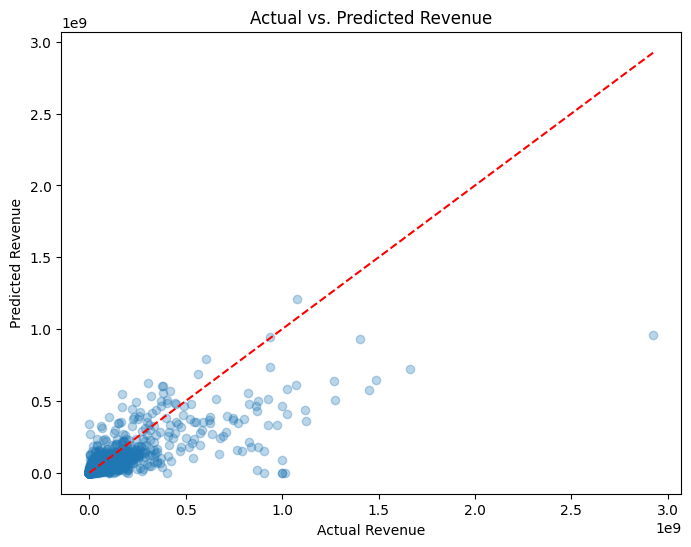

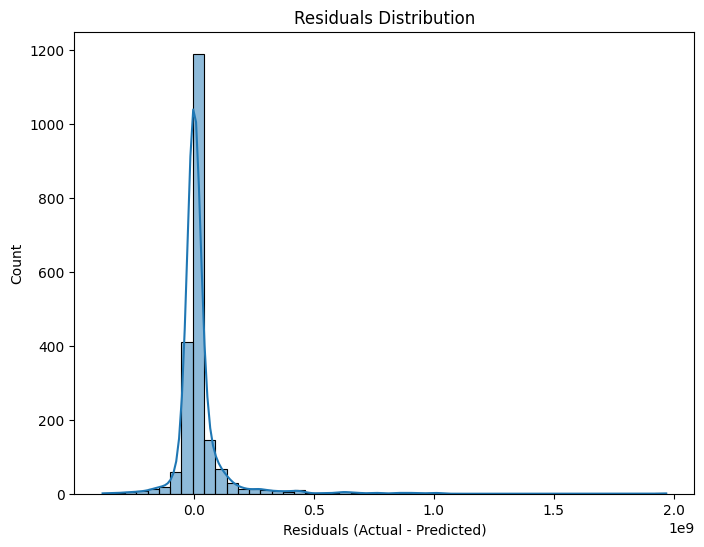

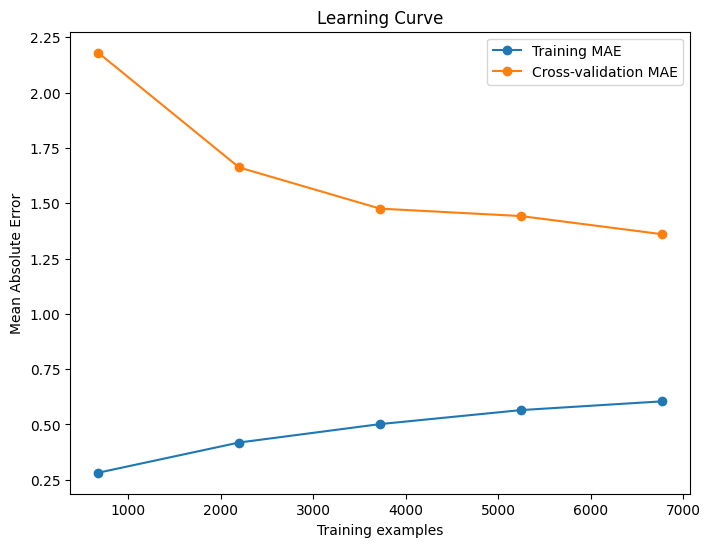

In [7]:
# %% [7] Evaluation and Additional Plots
# -----------------------------------------------------------------------------
from sklearn.metrics import mean_absolute_error, r2_score

# Define a helper function to calculate MAE and R², reverting the log transformation.
def evaluate_model(model, X, y):
    preds = model.predict(X)
    return {
        'MAE': np.expm1(mean_absolute_error(y, preds)),
        'R2': r2_score(y, preds)
    }

# Evaluate model performance on both training and test sets.
train_metrics = evaluate_model(best_model, X_train, y_train)
test_metrics = evaluate_model(best_model, X_test, y_test)

print("\n=== Training Metrics ===")
print(f"MAE: ${train_metrics['MAE']:,.2f}")
print(f"R²: {train_metrics['R2']:.3f}")

print("\n=== Test Metrics ===")
print(f"MAE: ${test_metrics['MAE']:,.2f}")
print(f"R²: {test_metrics['R2']:.3f}")

# --- Plot 1: Actual vs. Predicted Revenue ---
y_test_pred = best_model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(np.expm1(y_test), np.expm1(y_test_pred), alpha=0.3)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.plot([min(np.expm1(y_test)), max(np.expm1(y_test))],
         [min(np.expm1(y_test)), max(np.expm1(y_test))],
         color='red', linestyle='--')
plt.title("Actual vs. Predicted Revenue")
plt.show()

# --- Plot 2: Residuals Distribution ---
residuals = np.expm1(y_test) - np.expm1(y_test_pred)
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=50)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residuals Distribution")
plt.show()

# --- Plot 3: Learning Curve ---
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=3,
                                                        scoring='neg_mean_absolute_error',
                                                        train_sizes=np.linspace(0.1, 1.0, 5),
                                                        n_jobs=-1)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean  = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training MAE")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation MAE")
plt.xlabel("Training examples")
plt.ylabel("Mean Absolute Error")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


Part 8: Feature Importance

Here we interpret the model by looking at feature importance:

Extraction of Feature Importances:
(
The feature names generated from the preprocessing step are retrieved along with their corresponding importance scores from the Random Forest model.)

Visualization:
(
These scores are displayed using a bar plot, which shows which features have the greatest impact on the model’s predictions. This insight can help in understanding the drivers behind box office revenue.)


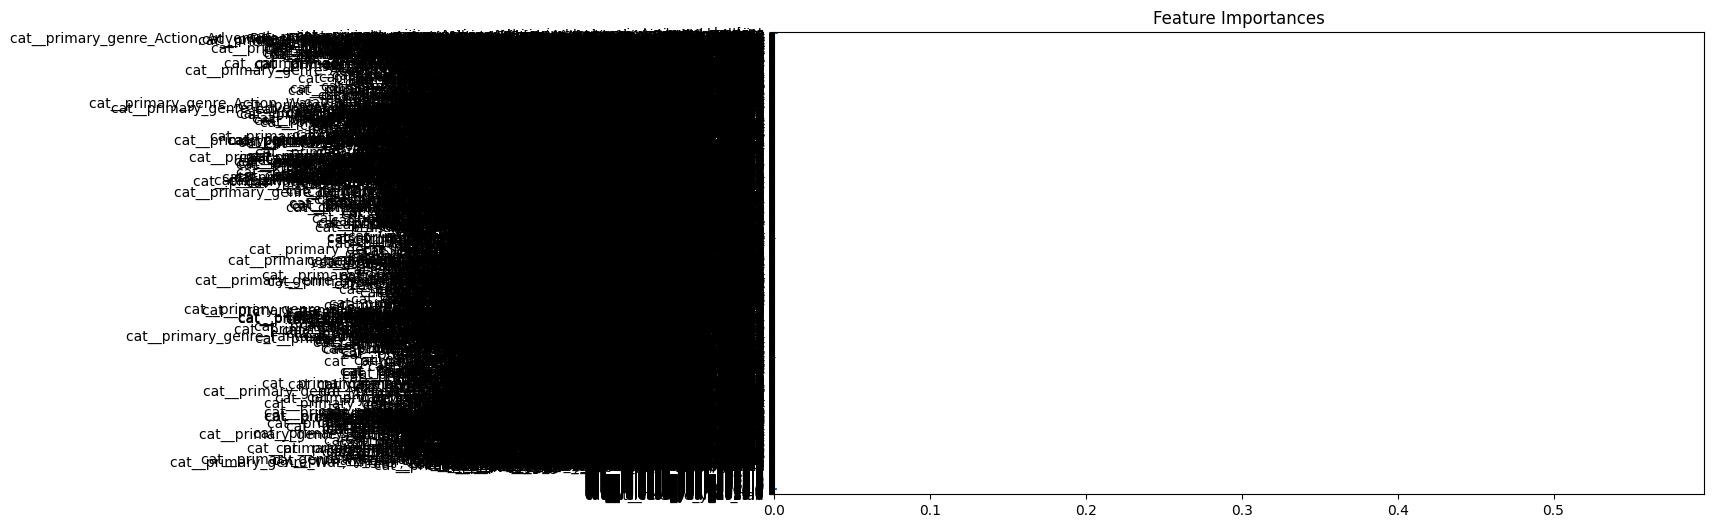

In [8]:
# %% [8] Feature Importance
# -----------------------------------------------------------------------------
# Retrieve feature names after preprocessing.
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Get importances from the RandomForest regressor.
importances = best_model.named_steps['regressor'].feature_importances_

plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.show()


Part 9: Deployment Preparation and Sample Prediction

The final section focuses on saving and using the model:

Model Saving:
(
The trained model (including preprocessing steps) is saved to disk using joblib. This ensures the model can be reloaded later without retraining.)

Prediction Function:
(
A helper function is provided to load the model and perform predictions on new data. The function includes the inverse of the log transformation (using np.expm1) to convert predictions back to a human-readable revenue format.)

Sample Prediction:
(
An example input is supplied (representing a new movie's attributes), and the prediction function is used to predict its revenue. This demonstrates the complete workflow from data ingestion to model deployment.)

In [9]:
# %% [9] Deployment Preparation and Sample Prediction
# -----------------------------------------------------------------------------
import joblib

# Save the trained model for deployment.
joblib.dump(best_model, 'movie_revenue_predictor.pkl')

# Define a helper function to load the model and make predictions.
def predict_revenue(input_data):
    model = joblib.load('movie_revenue_predictor.pkl')
    return np.expm1(model.predict(input_data))  # Revert the log transformation

# Example usage: predicting revenue for an input movie.
sample_input = pd.DataFrame([{
    'budget': 50000000,
    'runtime': 120,
    'popularity': 150,
    'vote_average': 7.5,
    'primary_genre': 'Action',
    'release_year': 2024,
    'budget_by_genre': 60000000
}])
print("\nSample prediction:", predict_revenue(sample_input))



Sample prediction: [1.3763716e+08]
